In [1]:
#!pip install geopandas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

### **Pitch**

El sector residencial es responsable de gran parte del consumo energético y emisiones de carbono en Europa, debe alcanzar calificaciones mínimas de eficiencia energética **E** para 2030 y **D** para 2033. Esto implica rehabilitar miles de edificios, pero la falta de datos detallados sobre los costes de intervención dificulta la planificación, especialmente en municipios no clasificados.


---

#### **Objetivo del proyecto**
Desarrollar un modelo de **Machine Learning** que prediga el **coste estimado por metro cuadrado** (**coste_intervencion_m2**) de rehabilitación energética en edificios residenciales.

---

#### **Variables utilizadas**
1. **Identificación y características básicas:**
   - `referencia_catastral`: Identificador único del edificio.
   - `uso_principal`: Uso del edificio (enfoque en residencial).
   - `altura_maxima`: Número de plantas del edificio.
   - `ano_construccion`: Año de construcción del edificio.
   - `superficie_vivienda`: Superficie promedio por vivienda en m².
   - `numero_viviendas`: Número total de viviendas en el edificio.
2. **Características energéticas:**
   - `demanda_calefaccion`: Demanda energética actual (kWh/m²·año).
   - `demanda_calefaccion_post_interverncion`: Demanda energética tras la intervención.
   - `calificacion_demanda_calefaccion`: Calificación energética actual.
   - `calificacion_demanda_calefaccion_post_intervencion`: Calificación energética tras la intervención.
3. **Variable objetivo:**
   - `coste_intervencion_m2`: Coste estimado por metro cuadrado (€).

*Fuente de los datos: [Urban3r](https://urban3r.es/).*

---

#### **Impacto**
Esta herramienta está diseñada para **administraciones públicas** y permitirá:
- Clasificar rápidamente municipios sin costes de intervención calculados.
- Priorizar intervenciones energéticas.
- Optimizar recursos para alcanzar las metas de sostenibilidad.

Con esta solución, se busca facilitar el cumplimiento de los objetivos normativos de 2030 y 2033. 

*Fuente normativa: [Directiva Europea de Eficiencia Energética en Edificaciones (EPBD)](https://ec.europa.eu/energy/topics/energy-efficiency/energy-efficient-buildings/energy-performance-buildings-directive_en).*


# Introducción y descripción del proyecto

El sector residencial representa una parte significativa del consumo energético y las emisiones de carbono en Europa. Según las normativas europeas de eficiencia energética, para el año **2030** todos los edificios deberán alcanzar como mínimo una calificación energética **E**, y para el año **2033**, una calificación mínima de **D**. Estas metas imponen el reto de rehabilitar energéticamente miles de edificios residenciales en todo el territorio europeo para cumplir con los objetivos de descarbonización establecidos en el **Pacto Verde Europeo** y la **Directiva de Eficiencia Energética en Edificaciones (EPBD)**.

En este contexto, surge la necesidad de herramientas ágiles y precisas que permitan estimar los costes de rehabilitación energética a nivel municipal y estatal. Este proyecto busca desarrollar un modelo de **Machine Learning** capaz de predecir el coste estimado por metro cuadrado (**coste_intervencion_m2**) de la rehabilitación energética en edificios residenciales, utilizando características estructurales, energéticas y geográficas de los edificios disponibles en el dataset.

El modelo está diseñado específicamente para ser utilizado por **administraciones públicas**, con el objetivo de clasificar rápidamente municipios que actualmente carecen de datos de coste, priorizando intervenciones y optimizando recursos para alcanzar los objetivos energéticos de 2030 y 2033.

*Fuente: [Directiva Europea de Eficiencia Energética en Edificaciones (EPBD)](https://ec.europa.eu/energy/topics/energy-efficiency/energy-efficient-buildings/energy-performance-buildings-directive_en).*

---

## Planteamiento del problema

Actualmente, muchas localidades en España no cuentan con datos detallados sobre los costes de rehabilitación energética de sus edificios. Este proyecto propone un enfoque predictivo que:
1. **Entrena un modelo supervisado** con datos completos de municipios clasificados, como Bilbao.
2. **Predice el coste estimado por metro cuadrado** para rehabilitaciones energéticas en edificios residenciales, basándose en sus características conocidas.
3. Proporciona un sistema ágil y automatizado para **clasificar municipios y priorizar actuaciones** en aquellos sin datos disponibles.

---

## Datos utilizados

El modelo se desarrollará utilizando datos procedentes de la plataforma [Urban3r](https://urban3r.es/) y del Catastro. La información clave incluye:

### **Variables predictoras (features):**
1. **referencia_catastral:** Identificador único del edificio.
2. **codigo_ine:** Código del municipio según el INE.
3. **nombre_municipio:** Nombre del municipio donde se encuentra el edificio.
4. **codigo_provincia:** Código de la provincia donde se encuentra el edificio.
5. **zona_climatica:** Clasificación de la zona climática del municipio.
6. **uso_principal:** Uso principal del edificio (residencial).
7. **altura_maxima:** Número de plantas del edificio.
8. **altura_maxima_categoria:** Categorización de la altura del edificio.
9. **tipologia_edificio:** Clasificación del edificio según su tipo constructivo.
10. **superficie_vivienda:** Superficie promedio por vivienda en el edificio (en m²).
11. **numero_viviendas:** Número total de viviendas en el edificio.
12. **numero_viviendas_categoria:** Categoría según el número de viviendas.
13. **cluster:** Clúster tipológico asignado al edificio, según la segmentación ERESEE 2020.
14. **demanda_calefaccion:** Demanda energética actual para calefacción (kWh/m²·año).
15. **demanda_calefaccion_post_intervencion:** Demanda energética estimada tras la intervención (kWh/m²·año).
16. **calificacion_demanda_calefaccion:** Calificación energética actual del edificio.
17. **calificacion_demanda_calefaccion_post_intervencion:** Calificación energética esperada tras la rehabilitación.

### **Variable objetivo (target):**
- **coste_intervencion_m2:** Coste estimado por metro cuadrado de la rehabilitación energética (en €/m²).

*Fuente: [Urban3r](https://urban3r.es/).*

---

## Enfoque del modelo

El objetivo del modelo es predecir **coste_intervencion_m2** utilizando un enfoque de regresión supervisada. Los pasos clave incluyen:
1. **Preparación del dataset:**
   - Filtrar únicamente los edificios de uso residencial.
   - Limpiar los datos y manejar valores faltantes, outliers y duplicados.
2. **Entrenamiento del modelo:**
   - Utilizar datos de municipios como Bilbao para entrenar el modelo.
   - Dividir los datos en conjuntos de entrenamiento y validación.
3. **Validación y ajuste:**
   - Evaluar el modelo utilizando métricas como RMSE, MAE y \( R^2 \).
   - Ajustar hiperparámetros y seleccionar el modelo con mejor desempeño.
4. **Generalización:**
   - Aplicar el modelo a municipios sin datos de coste para predecir **coste_intervencion_m2** en nuevos edificios.

---

## Impacto del proyecto

Este proyecto está diseñado exclusivamente para **administraciones públicas**, con los siguientes beneficios:
1. **Clasificación de municipios sin datos:** La herramienta permitirá estimar rápidamente el coste de rehabilitación energética en municipios no clasificados.
2. **Priorización de recursos:** Ayudará a identificar zonas con mayores necesidades y potencial impacto energético, maximizando el retorno social.
3. **Toma de decisiones informada:** Facilitará la planificación estratégica alineada con los objetivos normativos de sostenibilidad para 2030 y 2033.

Con este enfoque, el proyecto busca empoderar a las administraciones con una herramienta ágil, precisa y escalable, contribuyendo a la transición hacia un parque edificatorio más eficiente y sostenible.


## Importancia del Sector Residencial en Emisiones y Consumo Energético

El sector residencial tiene un impacto significativo en el consumo energético y las emisiones de CO₂ en España:

### **1. Emisiones de CO₂ por Sector**
El sector residencial contribuye de manera importante a las emisiones totales de CO₂ en España:
[Distribución de Emisiones de CO₂ por Sector](https://www.energiaysociedad.es/wp-content/uploads/2018/05/Emisiones-CO2-por-sector.png)
- **Fuente:** [Energía y Sociedad](https://www.energiaysociedad.es/asi-se-reparten-las-emisiones-de-co2-entre-los-principales-sectores-de-espana/)

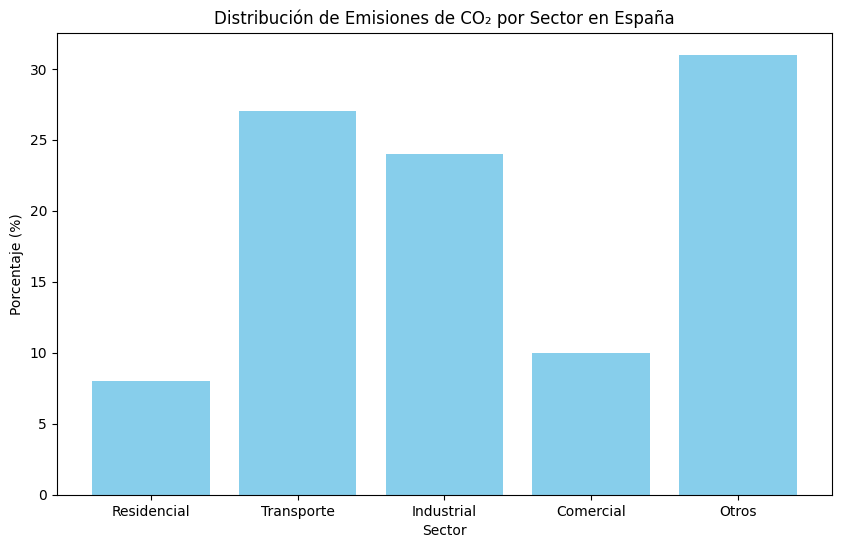

In [3]:
# Datos aproximados para emisiones de CO₂ por sector
sectors = ['Residencial', 'Transporte', 'Industrial', 'Comercial', 'Otros']
emissions = [8, 27, 24, 10, 31]  # Porcentajes aproximados

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(sectors, emissions, color='skyblue')
plt.title('Distribución de Emisiones de CO₂ por Sector en España')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Sector')
plt.show()


### **2. Consumo Energético por Uso**
En los hogares españoles, el consumo energético se distribuye principalmente en:
- **Calefacción:** 47%.
- **Agua caliente sanitaria:** 18%.
- **Electrodomésticos y cocina:** 26%.
- **Iluminación y otros usos:** 9%.
[Distribución del Consumo Energético en el Hogar](https://www.idae.es/sites/default/files/energia_residencial_idae_0.jpg)
- **Fuente:** [IDAE](https://www.idae.es/uploads/documentos/documentos_Informe_SPAHOUSEC_ACC_f68291a3.pdf)


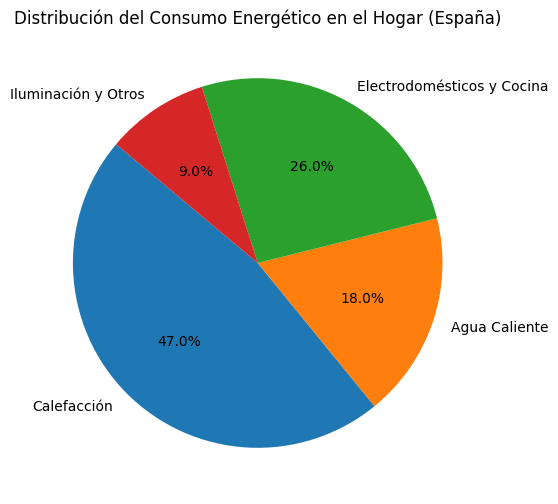

In [4]:
# Datos aproximados para el consumo energético
categories = ['Calefacción', 'Agua Caliente', 'Electrodomésticos y Cocina', 'Iluminación y Otros']
percentages = [47, 18, 26, 9]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Distribución del Consumo Energético en el Hogar (España)')
plt.show()


### **Conclusión**
Estos datos subrayan la importancia de mejorar la eficiencia energética en los edificios residenciales para reducir tanto el consumo de energía como las emisiones de carbono.

In [5]:
# Cargar el CSV en un DataFrame
df = pd.read_csv('data/48020.csv')

# Guardar el DataFrame en un archivo Excel
#df.to_excel('data/archivo_salida.xlsx', index=False)

In [6]:
df.head()

,Unnamed: 0,referencia_catastral,codigo_ine,nombre_municipio,codigo_provincia,zona_climatica,uso_principal,altura_maxima,altura_maxima_categoria,tipologia_edificio,...,superficie_vivienda,numero_viviendas,numero_viviendas_categoria,cluster,demanda_calefaccion,demanda_calefaccion_post_interverncion,calificacion_demanda_calefaccion,calificacion_demanda_calefaccion_post_intervencion,coste_intervencion_m2,coste_intervencion_viv
0,0,4802010101001,48020,Bilbao,48,C1,Común,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4802081399166,48020,Bilbao,48,C1,Aparcamiento,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4802081399168,48020,Bilbao,48,C1,Almacenaje,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4802081399167,48020,Bilbao,48,C1,Almacenaje,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4802081399169,48020,Bilbao,48,C1,Almacenaje,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11405 entries, 0 to 11404
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unnamed: 0                                          11405 non-null  int64  
 1   referencia_catastral                                11405 non-null  int64  
 2   codigo_ine                                          11405 non-null  int64  
 3   nombre_municipio                                    11405 non-null  object 
 4   codigo_provincia                                    11405 non-null  int64  
 5   zona_climatica                                      11405 non-null  object 
 6   uso_principal                                       11405 non-null  object 
 7   altura_maxima                                       8564 non-null   float64
 8   altura_maxima_categoria                             8564 non-null   object 


In [8]:
df.describe()

,Unnamed: 0,referencia_catastral,codigo_ine,codigo_provincia,altura_maxima,ano_construccion,superficie_vivienda,numero_viviendas,demanda_calefaccion,demanda_calefaccion_post_interverncion,coste_intervencion_m2,coste_intervencion_viv
count,11405.000000,1.140500e+04,11405.0,11405.0,8564.000000,8564.000000,8404.000000,11405.000000,8564.000000,8564.000000,8564.000000,8404.000000
mean,5702.000000,4.802050e+12,48020.0,48.0,5.141990,1950.479449,1641.873751,14.417536,76.090870,24.739019,80.938884,7644.032370
std,3292.484244,2.342735e+07,0.0,0.0,2.895819,31.542151,2063.114937,22.364553,32.493175,6.679430,23.601817,5306.814962
min,0.000000,4.802010e+12,48020.0,48.0,-3.000000,1700.000000,3.000000,0.000000,22.450000,12.480000,0.000000,475.040000
25%,2851.000000,4.802023e+12,48020.0,48.0,3.000000,1930.000000,441.750000,1.000000,58.260000,20.740000,62.270000,4939.397500
50%,5702.000000,4.802053e+12,48020.0,48.0,5.000000,1958.000000,1142.500000,9.000000,69.650000,24.470000,72.640000,6275.830000
75%,8553.000000,4.802072e+12,48020.0,48.0,7.000000,1969.000000,2061.250000,20.000000,74.030000,25.040000,88.870000,8439.752500
max,11404.000000,4.802082e+12,48020.0,48.0,27.000000,2017.000000,38495.000000,535.000000,155.260000,52.390000,150.380000,175984.520000


<Figure size 3000x3000 with 0 Axes>

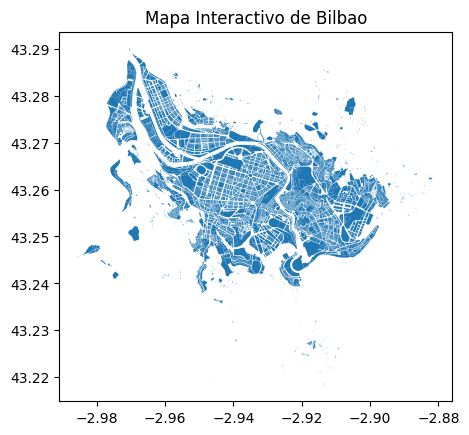

In [9]:
# Cargar el archivo GeoPackage
gdf = gpd.read_file('data/48020.gpkg')

# Configurar el tamaño de la figura
plt.figure(figsize=(30, 30))  # Ajusta el tamaño a tus necesidades (ancho, alto en pulgadas)

# Visualizar el mapa
gdf.plot()
plt.title("Mapa Interactivo de Bilbao")  # Título
plt.show()

In [10]:
gdf.head()

,referencia_catastral,codigo_ine,nombre_municipio,codigo_provincia,zona_climatica,uso_principal,altura_maxima,altura_maxima_categoria,tipologia_edificio,ano_construccion,...,numero_viviendas,numero_viviendas_categoria,cluster,demanda_calefaccion,demanda_calefaccion_post_interverncion,calificacion_demanda_calefaccion,calificacion_demanda_calefaccion_post_intervencion,coste_intervencion_m2,coste_intervencion_viv,geometry
0,4802010101001,48020,Bilbao,48,C1,Común,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.97034 43.29004, -2.97032 43..."
1,4802081399166,48020,Bilbao,48,C1,Aparcamiento,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95852 43.25414, -2.9585 43...."
2,4802081399168,48020,Bilbao,48,C1,Almacenaje,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95439 43.25327, -2.95442 43..."
3,4802081399167,48020,Bilbao,48,C1,Almacenaje,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95448 43.25322, -2.95454 43..."
4,4802081399169,48020,Bilbao,48,C1,Almacenaje,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95956 43.25371, -2.9596 43...."


In [11]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11405 entries, 0 to 11404
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   referencia_catastral                                11405 non-null  object  
 1   codigo_ine                                          11405 non-null  object  
 2   nombre_municipio                                    11405 non-null  object  
 3   codigo_provincia                                    11405 non-null  object  
 4   zona_climatica                                      11405 non-null  object  
 5   uso_principal                                       11405 non-null  object  
 6   altura_maxima                                       8564 non-null   float64 
 7   altura_maxima_categoria                             8564 non-null   object  
 8   tipologia_edificio                                  8564 n

In [12]:
gdf.describe()

,altura_maxima,ano_construccion,superficie_vivienda,numero_viviendas,demanda_calefaccion,demanda_calefaccion_post_interverncion,coste_intervencion_m2,coste_intervencion_viv
count,8564.000000,8564.000000,8404.000000,11405.000000,8564.000000,8564.000000,8564.000000,8404.000000
mean,5.141990,1950.479449,1641.873751,14.417536,76.090870,24.739019,80.938884,7644.032370
std,2.895819,31.542151,2063.114937,22.364553,32.493175,6.679430,23.601817,5306.814962
min,-3.000000,1700.000000,3.000000,0.000000,22.450000,12.480000,0.000000,475.040000
25%,3.000000,1930.000000,441.750000,1.000000,58.260000,20.740000,62.270000,4939.397500
50%,5.000000,1958.000000,1142.500000,9.000000,69.650000,24.470000,72.640000,6275.830000
75%,7.000000,1969.000000,2061.250000,20.000000,74.030000,25.040000,88.870000,8439.752500
max,27.000000,2017.000000,38495.000000,535.000000,155.260000,52.390000,150.380000,175984.520000


In [13]:
# Especificar las columnas a mantener
selected_columns = [
    "referencia_catastral", 
    "uso_principal", "altura_maxima", 
    "ano_construccion", "superficie_vivienda", 
    "numero_viviendas", "demanda_calefaccion", 
    "demanda_calefaccion_post_interverncion", "calificacion_demanda_calefaccion", 
    "calificacion_demanda_calefaccion_post_intervencion", "coste_intervencion_m2"
]

# Filtrar el DataFrame para quedarse solo con las columnas deseadas
df_filtered = df[selected_columns]


In [14]:
# Filtrar el DataFrame del CSV para incluir solo uso_principal == 'residencial'
df_residencial = df_filtered[df_filtered['uso_principal'].str.lower() == 'residencial']

# Verificar el número de filas después del filtrado
print(f"Número de edificios residenciales: {df_residencial.shape[0]}")

Número de edificios residenciales: 8260


In [15]:
df_residencial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8260 entries, 7 to 11404
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   referencia_catastral                                8260 non-null   int64  
 1   uso_principal                                       8260 non-null   object 
 2   altura_maxima                                       8260 non-null   float64
 3   ano_construccion                                    8260 non-null   float64
 4   superficie_vivienda                                 8117 non-null   float64
 5   numero_viviendas                                    8260 non-null   int64  
 6   demanda_calefaccion                                 8260 non-null   float64
 7   demanda_calefaccion_post_interverncion              8260 non-null   float64
 8   calificacion_demanda_calefaccion                    8260 non-null   object 
 9   c

In [16]:
# Eliminar filas con valores nulos
df_residencial = df_residencial.dropna()

In [17]:
df_residencial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8117 entries, 7 to 11404
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   referencia_catastral                                8117 non-null   int64  
 1   uso_principal                                       8117 non-null   object 
 2   altura_maxima                                       8117 non-null   float64
 3   ano_construccion                                    8117 non-null   float64
 4   superficie_vivienda                                 8117 non-null   float64
 5   numero_viviendas                                    8117 non-null   int64  
 6   demanda_calefaccion                                 8117 non-null   float64
 7   demanda_calefaccion_post_interverncion              8117 non-null   float64
 8   calificacion_demanda_calefaccion                    8117 non-null   object 
 9   c

In [18]:
#df_residencial.to_excel('data/residencial.xlsx', index=False)

In [19]:
df_residencial['referencia_catastral'].nunique()

8117

In [20]:
# Eliminar la columna 'uso_principal' del DataFrame
df_residencial = df_residencial.drop(columns=['uso_principal'])

# Verificar que la columna ha sido eliminada
df_residencial.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8117 entries, 7 to 11404
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   referencia_catastral                                8117 non-null   int64  
 1   altura_maxima                                       8117 non-null   float64
 2   ano_construccion                                    8117 non-null   float64
 3   superficie_vivienda                                 8117 non-null   float64
 4   numero_viviendas                                    8117 non-null   int64  
 5   demanda_calefaccion                                 8117 non-null   float64
 6   demanda_calefaccion_post_interverncion              8117 non-null   float64
 7   calificacion_demanda_calefaccion                    8117 non-null   object 
 8   calificacion_demanda_calefaccion_post_intervencion  8117 non-null   object 
 9   c

In [21]:
# Filtrar el DataFrame eliminando las filas donde 'calificacion_demanda_calefaccion' sea 'd'
df_residencial = df_residencial[df_residencial['calificacion_demanda_calefaccion'] != 'D']

# Verificar el resultado
print(df_residencial['calificacion_demanda_calefaccion'].value_counts())


calificacion_demanda_calefaccion
E    5943
G     795
F     644
Name: count, dtype: int64


In [22]:
df_residencial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7382 entries, 7 to 11404
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   referencia_catastral                                7382 non-null   int64  
 1   altura_maxima                                       7382 non-null   float64
 2   ano_construccion                                    7382 non-null   float64
 3   superficie_vivienda                                 7382 non-null   float64
 4   numero_viviendas                                    7382 non-null   int64  
 5   demanda_calefaccion                                 7382 non-null   float64
 6   demanda_calefaccion_post_interverncion              7382 non-null   float64
 7   calificacion_demanda_calefaccion                    7382 non-null   object 
 8   calificacion_demanda_calefaccion_post_intervencion  7382 non-null   object 
 9   c

In [23]:
#df_residencial.to_excel('data/residencial.xlsx', index=False)

In [24]:
from sklearn.preprocessing import LabelEncoder

# Crear un codificador de etiquetas
label_encoder = LabelEncoder()

# Codificar las columnas de tipo 'object' manteniendo el orden
for col in ['calificacion_demanda_calefaccion', 'calificacion_demanda_calefaccion_post_intervencion']:
    df_residencial[col] = label_encoder.fit_transform(df_residencial[col])

In [25]:
df_residencial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7382 entries, 7 to 11404
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   referencia_catastral                                7382 non-null   int64  
 1   altura_maxima                                       7382 non-null   float64
 2   ano_construccion                                    7382 non-null   float64
 3   superficie_vivienda                                 7382 non-null   float64
 4   numero_viviendas                                    7382 non-null   int64  
 5   demanda_calefaccion                                 7382 non-null   float64
 6   demanda_calefaccion_post_interverncion              7382 non-null   float64
 7   calificacion_demanda_calefaccion                    7382 non-null   int32  
 8   calificacion_demanda_calefaccion_post_intervencion  7382 non-null   int32  
 9   c

In [26]:
#df_residencial.to_excel('data/residencial2.xlsx', index=False)

In [27]:
# Separar variables predictoras (X) y variable objetivo (y)
X = df_residencial.drop(columns=['coste_intervencion_m2'])
y = df_residencial['coste_intervencion_m2']


In [28]:
from sklearn.model_selection import train_test_split

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.preprocessing import StandardScaler

# Escalar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# 1. Random Forest
rf_model = RandomForestRegressor(random_state=42)

# 2. XGBoost
xgb_model = XGBRegressor(random_state=42)

# 3. Gradient Boosting
gbr_model = GradientBoostingRegressor(random_state=42)

# Entrenar modelos iniciales
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='neg_mean_absolute_error')
rf_grid_search.fit(X_train, y_train)

# 2. XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
xgb_grid_search = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, cv=5, scoring='neg_mean_absolute_error')
xgb_grid_search.fit(X_train, y_train)

# 3. Gradient Boosting
gbr_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
gbr_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gbr_param_grid, cv=5, scoring='neg_mean_absolute_error')
gbr_grid_search.fit(X_train, y_train)

# Imprimir mejores parámetros
print("Random Forest Best Params:", rf_grid_search.best_params_)
print("XGBoost Best Params:", xgb_grid_search.best_params_)
print("Gradient Boosting Best Params:", gbr_grid_search.best_params_)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Función para calcular métricas
def evaluate_model(model, X_train, y_train, X_test, y_test):
    metrics = {}
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Métricas en train
    metrics['Train_MAE'] = mean_absolute_error(y_train, y_train_pred)
    metrics['Train_RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
    metrics['Train_R2'] = r2_score(y_train, y_train_pred)
    
    # Métricas en test
    metrics['Test_MAE'] = mean_absolute_error(y_test, y_test_pred)
    metrics['Test_RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)
    metrics['Test_R2'] = r2_score(y_test, y_test_pred)
    
    return metrics

# Evaluar los modelos
models = {
    "Random Forest": rf_grid_search.best_estimator_,
    "XGBoost": xgb_grid_search.best_estimator_,
    "Gradient Boosting": gbr_grid_search.best_estimator_
}

results = {model_name: evaluate_model(model, X_train, y_train, X_test, y_test) for model_name, model in models.items()}

# Convertir a DataFrame para visualizar resultados
metrics_df = pd.DataFrame(results).T
metrics_df = metrics_df.round(4)  # Redondear métricas para mayor claridad

# Obtener predicciones de cada modelo
predictions = {}
for model_name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    predictions[model_name] = {
        "y_train_actual": y_train,
        "y_train_pred": y_train_pred,
        "y_test_actual": y_test,
        "y_test_pred": y_test_pred
    }

# Exportar resultados a un archivo Excel
with pd.ExcelWriter("model_results_and_predictions.xlsx") as writer:
    # Guardar métricas
    metrics_df.to_excel(writer, sheet_name="Metrics")

    # Guardar predicciones de cada modelo
    for model_name, preds in predictions.items():
        pred_df = pd.DataFrame({
            "y_train_actual": preds["y_train_actual"],
            "y_train_pred": preds["y_train_pred"],
            "y_test_actual": preds["y_test_actual"],
            "y_test_pred": preds["y_test_pred"]
        })
        pred_df.to_excel(writer, sheet_name=f"{model_name}_Predictions", index=False)

print("Resultados exportados a 'model_results_and_predictions.xlsx'")



                      Train_MAE  Train_RMSE  Train_R2  Test_MAE  Test_RMSE  \
Random Forest      2.115614e-03    0.079097  0.999986  0.020609   0.678295   
XGBoost            2.939481e-05    0.000302  1.000000  0.022072   0.496657   
Gradient Boosting  9.475158e-07    0.000003  1.000000  0.019178   0.640720   

                    Test_R2  
Random Forest      0.999026  
XGBoost            0.999478  
Gradient Boosting  0.999131  


c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: '

# Análisis del Desempeño de los Modelos

## 1. Evaluación del Rendimiento

### **Random Forest**
- **Train_MAE:** 0.0021 | **Test_MAE:** 0.0206
- **Train_RMSE:** 0.0791 | **Test_RMSE:** 0.6783
- **Train_R²:** 0.999986 | **Test_R²:** 0.999026

Este modelo tiene un desempeño muy bueno, pero muestra una ligera diferencia entre el error en entrenamiento y prueba. Esto podría ser un indicio leve de sobreajuste.

---

### **XGBoost**
- **Train_MAE:** 0.000029 | **Test_MAE:** 0.0221
- **Train_RMSE:** 0.0003 | **Test_RMSE:** 0.4967
- **Train_R²:** 1.000000 | **Test_R²:** 0.999478

XGBoost se ajusta mejor al conjunto de prueba, con el menor **Test_RMSE** (0.4967) y el mayor **Test_R²** (0.999478) de los tres modelos. Aunque el modelo tiene una precisión perfecta en el entrenamiento, lo que podría indicar un ajuste excesivo, su desempeño en el conjunto de prueba es excelente.

---

### **Gradient Boosting**
- **Train_MAE:** 0.00000095 | **Test_MAE:** 0.0192
- **Train_RMSE:** 0.000003 | **Test_RMSE:** 0.6407
- **Train_R²:** 1.000000 | **Test_R²:** 0.999131

Gradient Boosting también tiene un desempeño sobresaliente, con métricas muy similares a las de XGBoost. Su **Test_MAE** es ligeramente menor que el de XGBoost, lo que indica un buen ajuste para minimizar los errores absolutos.

---

## 2. Observaciones Clave
1. **XGBoost tiene el mejor desempeño general en el conjunto de prueba,** con el menor **RMSE** (0.4967) y el mejor **R²** (0.999478). Es el modelo más robusto frente al sobreajuste.
2. **Gradient Boosting tiene un desempeño casi igual a XGBoost,** pero con un error absoluto ligeramente menor en el conjunto de prueba.
3. **Random Forest también es muy preciso,** aunque muestra una mayor diferencia entre entrenamiento y prueba, lo que sugiere que podría ser más propenso al sobreajuste.

---

## 3. Conclusión
- **XGBoost** y **Gradient Boosting** son los mejores modelos para este caso. 
- Si necesitas priorizar precisión, utiliza **XGBoost**. 
- Si prefieres un modelo más interpretable y con menor error absoluto, usa **Gradient Boosting**.

Si necesitas realizar ajustes adicionales o interpretar las características más importantes de los modelos, ¡puedo ayudarte! 🚀
